In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [6]:
fashion_train = datasets.FashionMNIST(root='data',
                                        train=True,
                                        transform=transforms.Compose([transforms.ToTensor()]),
                                        download=True)
fashion_test = datasets.FashionMNIST(root='data',
                                        train=False,
                                        transform=transforms.Compose([transforms.ToTensor()]),
                                        download=True)

100%|██████████| 26.4M/26.4M [00:11<00:00, 2.21MB/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 112kB/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4.42M/4.42M [00:02<00:00, 1.62MB/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



# 데이터 로드 및 전처리

In [9]:
# 데이터 로드
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 데이터 정규화 (0~255 값을 0~1로 스케일링)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 라벨 원-핫 인코딩 (필요에 따라)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# 모델 정의

In [10]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # 28x28 이미지를 1차원 배열로 변환
    Dense(128, activation='relu'), # 히든 레이어 1
    Dropout(0.2),                  # 과적합 방지
    Dense(64, activation='relu'),  # 히든 레이어 2
    Dense(10, activation='softmax') # 출력 레이어 (10개 클래스 확률)
])

c:\Users\COM\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 모델 컴파일

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습

In [12]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7409 - loss: 0.7422 - val_accuracy: 0.8447 - val_loss: 0.4309
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8452 - loss: 0.4225 - val_accuracy: 0.8636 - val_loss: 0.3733
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8619 - loss: 0.3855 - val_accuracy: 0.8698 - val_loss: 0.3621
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8678 - loss: 0.3562 - val_accuracy: 0.8704 - val_loss: 0.3501
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8737 - loss: 0.3383 - val_accuracy: 0.8701 - val_loss: 0.3521
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8771 - loss: 0.3302 - val_accuracy: 0.8818 - val_loss: 0.3261
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8847 - loss: 0.3147 - val_accuracy: 0.8842 - val_loss: 0.3202
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8884 - loss: 0.2969 - 

# 모델 평가

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8747 - loss: 0.3549
테스트 정확도: 0.8733999729156494


# 결과 시각화

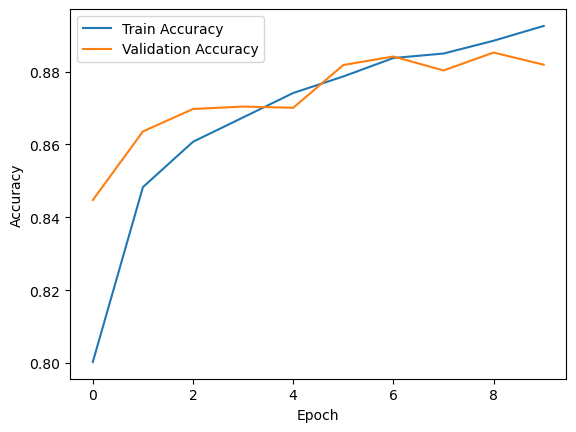

In [14]:
# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 추론 예제

In [15]:
# 예측
predictions = model.predict(x_test)
print("예측 결과:", np.argmax(predictions[0]))
print("실제 라벨:", np.argmax(y_test[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
예측 결과: 9
실제 라벨: 9
